<a href="https://colab.research.google.com/github/paulmachau/Dogecion-Historical-Prices/blob/main/Dogecoin_price_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
!pip install yfinance
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import plotly.graph_objects as go
!pip install pandas_ta
from statsmodels.tsa.stattools import adfuller, kpss
import pandas_ta as ta
from plotly.subplots import make_subplots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error
!pip install fbprophet
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
!pip install mplfinance
from mplfinance.original_flavor import candlestick_ohlc

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.9.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (45.3 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.2-py3-none-any.w

importing the necessary Libraries including yfinance

In [2]:

# Define the ticker symbol for Dogecoin
ticker_symbol = 'DOGE-USD'

# Set the start and end dates for historical data
start_date = '2014-01-01'
end_date = '2024-01-01'

# Download historical data from Yahoo Finance
dogecoin_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
csv_filename = 'dogecoin_data.csv'
dogecoin_data.to_csv(csv_filename)

# Print the dynamically generated file name
print(csv_filename)


[*********************100%%**********************]  1 of 1 completed

dogecoin_data.csv


Downloading Dogecoin historical data between 2014 to 2024  dates. The data is then saved to a CSV file named 'dogecoin_data.csv'.

In [3]:
#viewing the csv file
dogecoin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [4]:
# Get info about the dataset
dogecoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2244 entries, 2017-11-09 to 2023-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2244 non-null   float64
 1   High       2244 non-null   float64
 2   Low        2244 non-null   float64
 3   Close      2244 non-null   float64
 4   Adj Close  2244 non-null   float64
 5   Volume     2244 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 122.7 KB


In [5]:
# Display the column name
dogecoin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


The data consists of 2244 entries and 6 columns

In [6]:
# Check unique values across the entire DataFrame
unique_values_overall = dogecoin_data.nunique()

# Print the unique values
print("Unique Values Overall:")
print(unique_values_overall)


Unique Values Overall:
Open         2013
High         2018
Low          2003
Close        2020
Adj Close    2020
Volume       2244
dtype: int64


In [7]:
# Display the column names
print(dogecoin_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [8]:
dogecoin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [9]:
# Display summary statistics for all columns
summary_statistics_all = dogecoin_data.describe(include='all')

# Print the summary statistics for all columns
print("Summary Statistics for All Columns:")
print(summary_statistics_all)


Summary Statistics for All Columns:
              Open         High          Low        Close    Adj Close  \
count  2244.000000  2244.000000  2244.000000  2244.000000  2244.000000   
mean      0.063036     0.066283     0.059919     0.063085     0.063085   
std       0.090186     0.097103     0.083486     0.090233     0.090233   
min       0.001046     0.001210     0.001002     0.001038     0.001038   
25%       0.002678     0.002751     0.002616     0.002680     0.002680   
50%       0.007405     0.008361     0.006858     0.007473     0.007473   
75%       0.081055     0.083612     0.079213     0.081125     0.081125   
max       0.687801     0.737567     0.608168     0.684777     0.684777   

             Volume  
count  2.244000e+03  
mean   9.250561e+08  
std    3.189198e+09  
min    1.431720e+06  
25%    3.882560e+07  
50%    1.732271e+08  
75%    6.373313e+08  
max    6.941068e+10  


*inferences*
The code above shows a summurry statistics for all the columns  indicating the Mean, Mode, Median and the percentiles

In [10]:
# Display the column names
dogecoin_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [11]:
# Convert the index to datetime
dogecoin_data.index = pd.to_datetime(dogecoin_data.index)

# Now you can proceed with your analysis or visualization code


#EDA

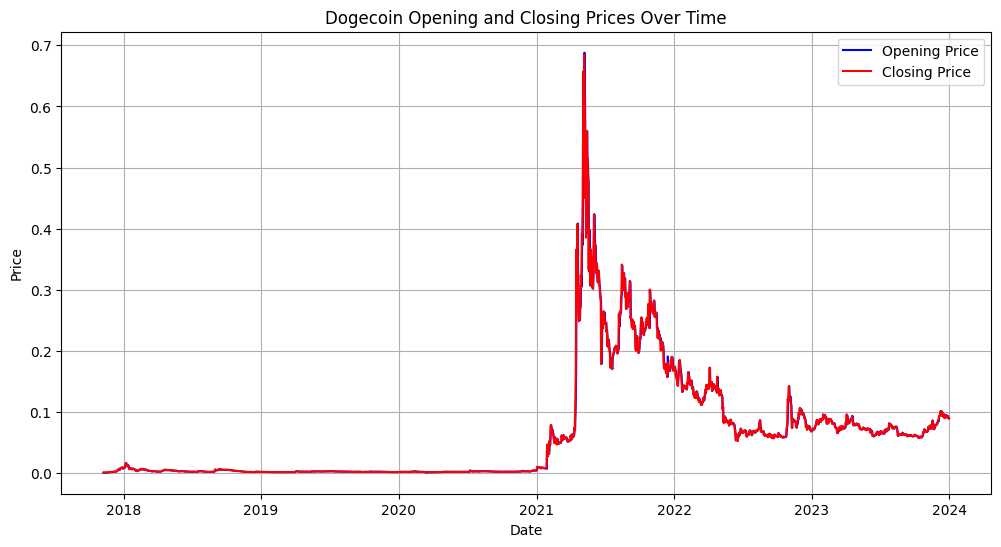

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(dogecoin_data.index, dogecoin_data['Open'], label='Opening Price', color='blue')
plt.plot(dogecoin_data.index, dogecoin_data['Close'], label='Closing Price', color='red')
plt.title('Dogecoin Opening and Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


*inferences*

The graph shows the distribution of the opening and closing prices over time, with red being the closing price and blue being the opening price

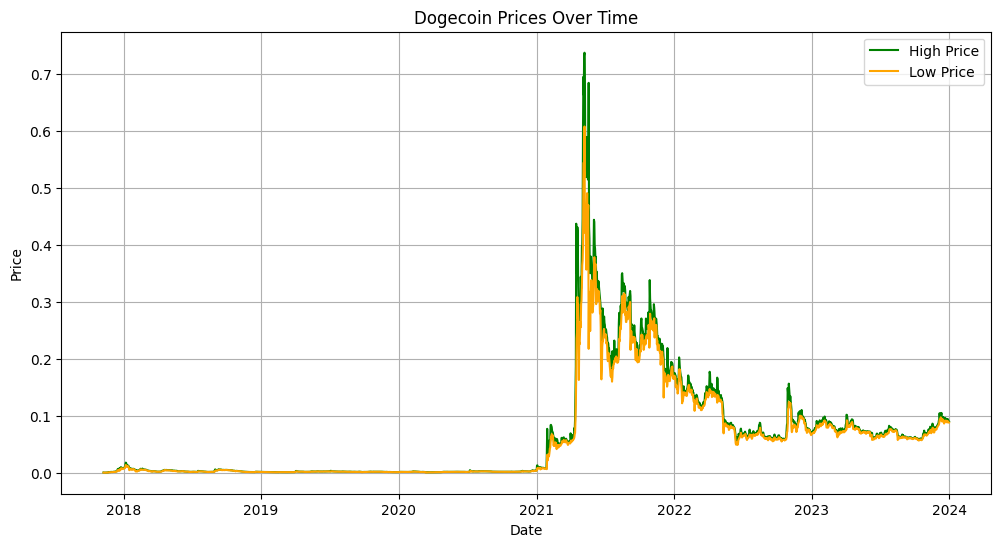

In [13]:

plt.figure(figsize=(12, 6))
plt.plot(dogecoin_data.index, dogecoin_data['High'], label='High Price', color='green')
plt.plot(dogecoin_data.index, dogecoin_data['Low'], label='Low Price', color='orange')
plt.title('Dogecoin Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


**inferences*

The graph shows the high and low prices over time in between 2021 and 2022 being the pick having the highest prices and then falling progressively after that to 2024

**Plots showing the daily and weekly distriution of prices over time**

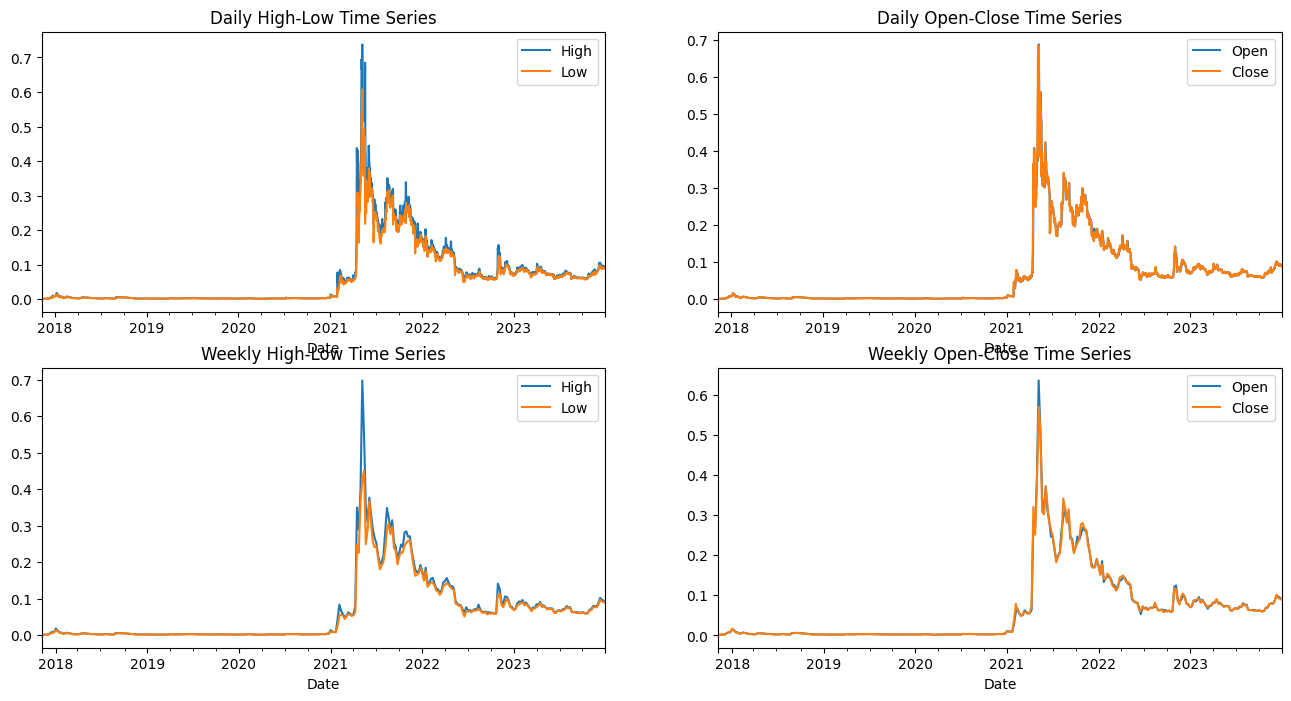

In [14]:
 #Create subplots for different graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

# Daily High-Low Time Series Plot
dogecoin_data[['High', 'Low']].plot(ax=axes[0, 0], title='Daily High-Low Time Series')

# Daily Open-Close Time Series Plot
dogecoin_data[['Open', 'Close']].plot(ax=axes[0, 1], title='Daily Open-Close Time Series')

# Weekly High-Low Time Series Plot
weekly_data = dogecoin_data.resample('W').last()
weekly_data[['High', 'Low']].plot(ax=axes[1, 0], title='Weekly High-Low Time Series')

# Weekly Open-Close Time Series Plot
weekly_data[['Open', 'Close']].plot(ax=axes[1, 1], title='Weekly Open-Close Time Series')

# Adjust layout
plt.show()

*Inferences*

**Daily High-Low Time Series Plot**:

* Volatility: There are small fluctuations between daily high and low prices, it suggests low volatility in the market.

* Trends: Consistent trends over time could indicate a directional movement in prices.

**Daily Open-Close Time Series Plot:**

* Trend Identification: There's a consistent pattern of closing prices being higher or lower than opening prices, it indicates a trend in daily movements.

**Weekly High-Low Time Series Plot:**

* Cycles or Patterns: The repeating patterns on a weekly basis may suggest cyclical behavior.

**Weekly Open-Close Time Series Plot:**

* Long-Term Trends: Similar to daily open-close plots, but on a weekly scale.
* Investor Behavior: Patterns may indicate investor behavior over the course of a week.

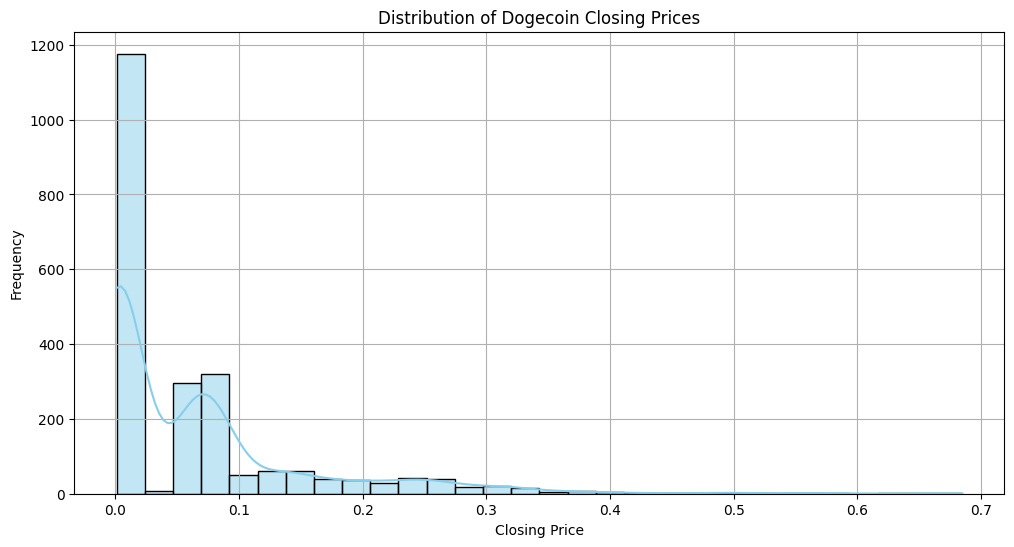

In [15]:

# Plot histogram of Dogecoin closing prices
plt.figure(figsize=(12, 6))
sns.histplot(dogecoin_data['Close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Dogecoin Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


*Inferences*

The graph show the distribution of closing prices on a histogram  it is skewed to the left (negative skewness), it suggests that there are few instances of very low closing prices

In [16]:
# Resample to weekly frequency
weekly_data = dogecoin_data.resample('W').last()


In [17]:
dogecoin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


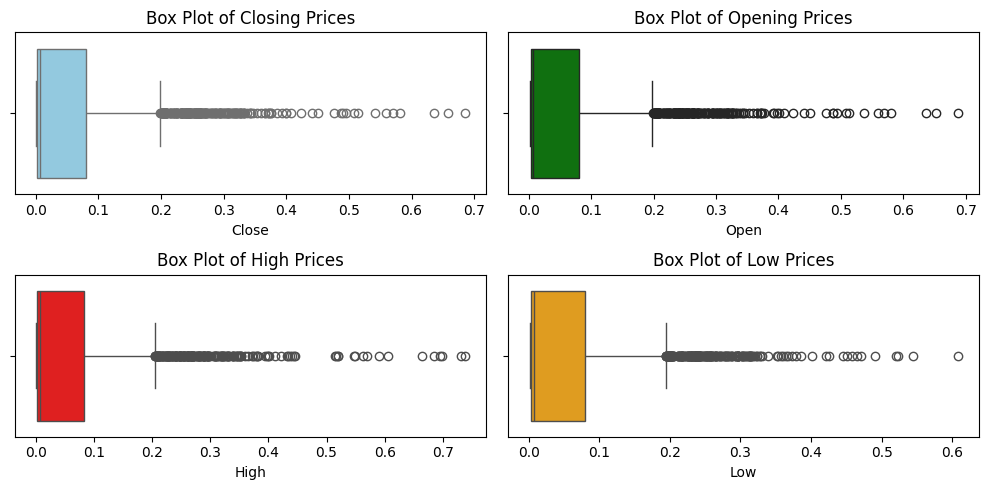

In [18]:
#cheking for outliers and creating box plots to show the distribution
# Set up a 2x2 grid for box plots
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Closing Price Box Plot
sns.boxplot(x=dogecoin_data['Close'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Box Plot of Closing Prices')

# Opening Price Box Plot
sns.boxplot(x=dogecoin_data['Open'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Box Plot of Opening Prices')

# High Price Box Plot
sns.boxplot(x=dogecoin_data['High'], ax=axes[1, 0], color='red')
axes[1, 0].set_title('Box Plot of High Prices')

# Low Price Box Plot
sns.boxplot(x=dogecoin_data['Low'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Box Plot of Low Prices')

plt.tight_layout()
plt.show()

*Inferences*
The graph above shows the box plots indicating the outliers in different variables.

**Closing Price Box Plot**:The box plot for closing prices reveals a relatively symmetrical distribution with a few potential outliers on the higher side.

**Opening Price Box Plot**:The box plot for opening prices mirrors the closing prices' distribution, indicating a strong positive correlation

**High Price Box Plot**:The box plot for high prices shows a wider spread compared to closing and opening prices.

**Low Price Box Plot**;The box plot for low prices exhibits a similar distribution to high prices but with a wider spread.

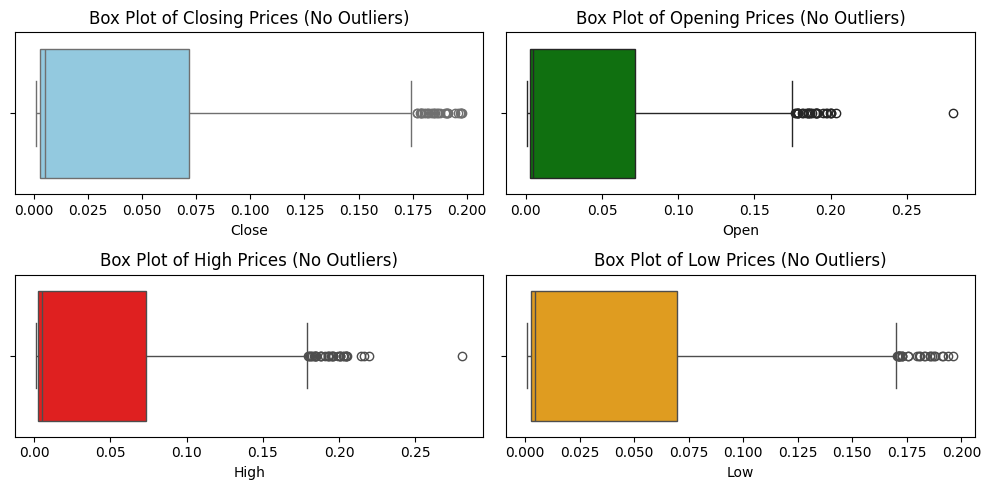

In [19]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers from Closing Price
dogecoin_no_outliers = remove_outliers(dogecoin_data, 'Close')

# Set up a 2x2 grid for box plots after removing outliers
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Closing Price Box Plot after removing outliers
sns.boxplot(x=dogecoin_no_outliers['Close'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Box Plot of Closing Prices (No Outliers)')

# Opening Price Box Plot after removing outliers
sns.boxplot(x=dogecoin_no_outliers['Open'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Box Plot of Opening Prices (No Outliers)')

# High Price Box Plot after removing outliers
sns.boxplot(x=dogecoin_no_outliers['High'], ax=axes[1, 0], color='red')
axes[1, 0].set_title('Box Plot of High Prices (No Outliers)')

# Low Price Box Plot after removing outliers
sns.boxplot(x=dogecoin_no_outliers['Low'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Box Plot of Low Prices (No Outliers)')

plt.tight_layout()
plt.show()

*Inferences*


* The graph shows graphical representations after removing outliers and this will creat more accuracy in our data set when modelling

**calculating the Daily Price change between the closing and opening prices**

*The code will add the 'Price_change' and 'Percent_return' columns to the DataFrame df and display the updated DataFrame showing the daily price change and percentage return for each day. This information can be used to analyze the daily performance and volatility of the stock*

In [20]:
# Calculate daily price change
dogecoin_data['Daily_Price_Change'] = dogecoin_data['Close'].diff()

# Calculate daily percentage return
dogecoin_data['Daily_Percentage_Return'] = (dogecoin_data['Daily_Price_Change'] / dogecoin_data['Close']) * 100

# Display the updated dataset
print(dogecoin_data.head())


                Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2017-11-09  0.001207  0.001415  0.001181  0.001415   0.001415  6259550   
2017-11-10  0.001421  0.001431  0.001125  0.001163   0.001163  4246520   
2017-11-11  0.001146  0.001257  0.001141  0.001201   0.001201  2231080   
2017-11-12  0.001189  0.001210  0.001002  0.001038   0.001038  3288960   
2017-11-13  0.001046  0.001212  0.001019  0.001211   0.001211  2481270   

            Daily_Price_Change  Daily_Percentage_Return  
Date                                                     
2017-11-09                 NaN                      NaN  
2017-11-10           -0.000252               -21.668094  
2017-11-11            0.000038                 3.164025  
2017-11-12           -0.000163               -15.703272  
2017-11-13            0.000173                14.285717  


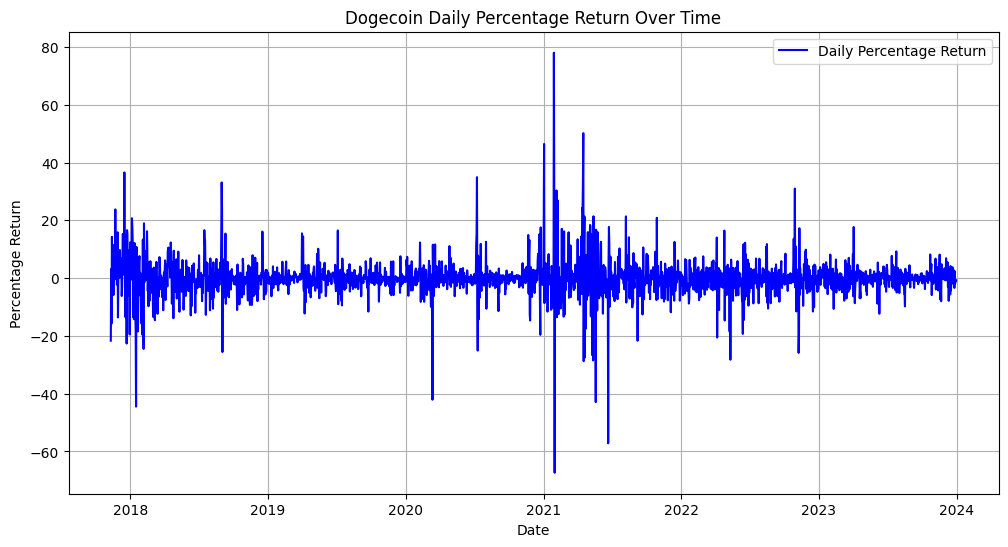

In [21]:
# Create a line plot showing the percentage return over time
plt.figure(figsize=(12, 6))
plt.plot(dogecoin_data.index, dogecoin_data['Daily_Percentage_Return'], label='Daily Percentage Return', color='blue')
plt.title('Dogecoin Daily Percentage Return Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.legend()
plt.grid(True)
plt.show()

**Inferences**

Volatility:The plot has frequent large spikes (both positive and negative), it sugggests higher volatility in daily returns.

Trends: Consistent upward or downward trends in the percentage return  indicate periods of sustained price movement.

Outliers: Large spikes or drops in the percentage return may represent outlier events affecting the market.

In [22]:
# Create a figure
fig = go.Figure(data=[go.Candlestick(x=dogecoin_data.index,
                open=dogecoin_data['Open'],
                high=dogecoin_data['High'],
                low=dogecoin_data['Low'],
                close=dogecoin_data['Close'],
                increasing_line_color='red',  # Red for bearish (closing price < opening price)
                decreasing_line_color='green'  # You can use a different color for bullish days
                )])

# Set layout
fig.update_layout(title='Dogecoin Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the plot
fig.show()

*Inferences*

* Red Candlesticks: Indicate bearish days where the closing price is lower than the opening price. It suggests a negative sentiment or downward movement.

* Green Candlesticks: Represent bullish days with a closing price higher than the opening price. This suggests a positive sentiment or upward movement.

* Red Candlestick Body: The bottom of the body represents the opening price, and the top represents the closing price. The body being red indicates a bearish day.

* Wicks or Tails: The thin lines (wicks) above and below the body represent the highest and lowest prices reached during the trading day.

* The length of the candlesticks and the range between the high and low prices to gauge the volatility of Dogecoin during the observed period.

**Relative Strength Index (RSI) and  the MACD (Moving Average Convergence Divergence)**:

These indicators can provide insights into trends, momentum, overbought or oversold conditions, and potential reversal points

In [23]:
# Calculate MACD
short_window = 12
long_window = 26
signal_window = 9

dogecoin_data['MACD'], dogecoin_data['Signal'], _ = ta.macd(dogecoin_data['Close'], fast=short_window, slow=long_window, signal=signal_window)

# Plot MACD
fig_macd = go.Figure()
fig_macd.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['MACD'], mode='lines', name='MACD Line'))
fig_macd.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['Signal'], mode='lines', name='Signal Line'))
fig_macd.update_layout(title='MACD for Dogecoin',
                       xaxis_title='Date',
                       yaxis_title='MACD',
                       xaxis_rangeslider_visible=False)
fig_macd.show()


In [24]:
# Calculate RSI
rsi_length = 14
dogecoin_data['RSI'] = ta.rsi(dogecoin_data['Close'], length=rsi_length)

# Plot RSI
fig_rsi = go.Figure()
fig_rsi.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['RSI'], mode='lines', name='RSI'))
fig_rsi.update_layout(title='Relative Strength Index (RSI) for Dogecoin',
                      xaxis_title='Date',
                      yaxis_title='RSI',
                      xaxis_rangeslider_visible=False)
fig_rsi.show()


In [25]:
# Plot combined graph
fig_combined = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)
fig_combined.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['Close'], mode='lines', name='Close Price'), row=1, col=1)
fig_combined.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['MACD'], mode='lines', name='MACD Line'), row=2, col=1)
fig_combined.add_trace(go.Scatter(x=dogecoin_data.index, y=dogecoin_data['Signal'], mode='lines', name='Signal Line'), row=2, col=1)
fig_combined.update_layout(title='Combined Analysis for Dogecoin',
                           xaxis_title='Date',
                           xaxis_rangeslider_visible=False)
fig_combined.show()


*Inferences*

 * The MACD Signal Line is consistently above the MACD Line, it indicates a bearish trend. This configuration suggests that the short-term moving average (Signal Line) is outperforming the longer-term moving average (MACD Line), signaling potential downward price movement

 * RSI values above 70 indicate overbought conditions, suggesting that the asset may be overvalued, and there is a potential for a price correction.

* RSI values below 30 indicate oversold conditions, suggesting that the asset may be undervalued, and there is a potential for a price rebound.

<ipython-input-26-aa26536738dc>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



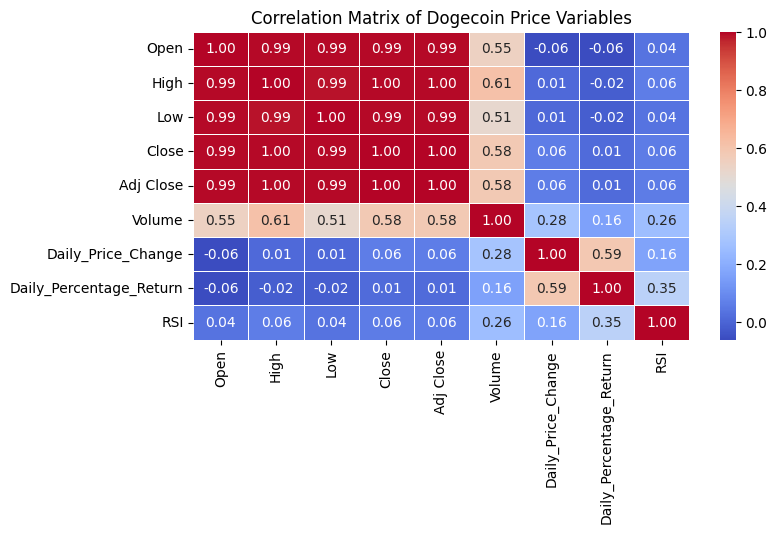

In [26]:

# Calculate the correlation matrix
correlation_matrix = dogecoin_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Dogecoin Price Variables')
plt.show()

*inferences*

* High Positive Correlations:The columns 'Open,' 'High,' 'Low,' and 'Close' show very high positive correlations with each other (close to 1)

* Negative Correlation with Daily Price Change:The 'Daily_Price_Change' column has a negative correlation with the 'Open,' 'High,' 'Low,' and 'Close' columns.

* Positive Correlation with Daily Percentage Return:The 'Daily_Percentage_Return' column has a positive correlation with the 'Daily_Price_Change' column, indicating that larger percentage returns are associated with larger price changes

* Weak Correlation with RSI:The 'RSI' column has weak positive correlations with the price-related columns. RSI is a momentum indicator, and its correlation with price-related columns may not be very strong.

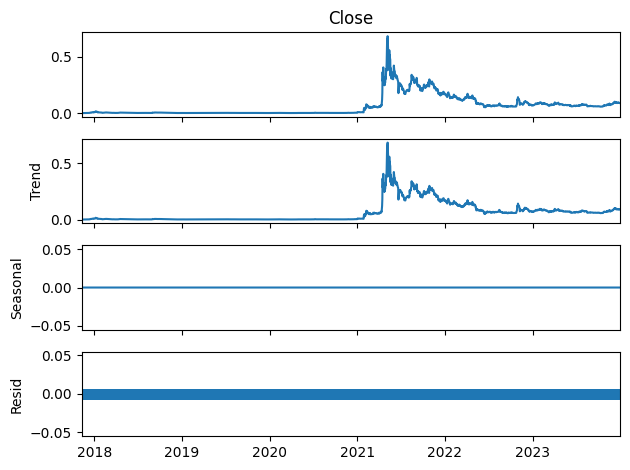

In [27]:

result = seasonal_decompose(dogecoin_data['Close'], model='additive', period=1)
result.plot()
plt.show()


*Inferences*

The graphical reperesntations shows the Decomposing a time series into its components (trend, seasonality, and residual) using seasonal decomposition techniques provides insights into the underlying patterns and fluctuations in the data

In [28]:
dogecoin_data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Price_Change,Daily_Percentage_Return,MACD,Signal,RSI
Date,,,,,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,NaN,NaN,MACD_12_26_9,MACDh_12_26_9,NaN
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,-0.000252,-21.668094,MACD_12_26_9,MACDh_12_26_9,NaN
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,0.000038,3.164025,MACD_12_26_9,MACDh_12_26_9,NaN
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,-0.000163,-15.703272,MACD_12_26_9,MACDh_12_26_9,NaN
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,0.000173,14.285717,MACD_12_26_9,MACDh_12_26_9,NaN


In [29]:
# Drop highly correlated columns and keep only 'Close'
selected_columns = ['Close', 'Daily_Price_Change', 'Daily_Percentage_Return', 'RSI']
dogecoin_model_data = dogecoin_data[selected_columns]
dogecoin_model_data.head()


,Close,Daily_Price_Change,Daily_Percentage_Return,RSI
Date,,,,
2017-11-09,0.001415,NaN,NaN,NaN
2017-11-10,0.001163,-0.000252,-21.668094,NaN
2017-11-11,0.001201,0.000038,3.164025,NaN
2017-11-12,0.001038,-0.000163,-15.703272,NaN
2017-11-13,0.001211,0.000173,14.285717,NaN


**Cheking For Stationarity**

The code below checks for stationarity where Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. The null hypothesis for the ADF test is that the time series has a unit root, indicating non-stationarity. The null hypothesis for the KPSS test is that the time series is stationary around a deterministic trend.

In [30]:
# Assuming 'Close' is the column of closing prices
closing_prices = dogecoin_model_data['Close']

# ADF Test
result_adf = adfuller(closing_prices, autolag='AIC')
print('ADF Test:')
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print(f'Critical Values: {result_adf[4]}')


ADF Test:
ADF Statistic: -2.7127486186845418
p-value: 0.07185806277965305
Critical Values: {'1%': -3.4333043732334776, '5%': -2.8628451528896735, '10%': -2.5674647958480494}


*inference*
* The p-value is slightly higher than the common significance level of 0.05, suggesting weak evidence against the null hypothesis.

* The ADF Statistic is not strongly negative, but it's still indicative of potential stationarity

In [31]:
# KPSS Test
result_kpss = kpss(closing_prices, regression='c')
print('\nKPSS Test:')
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')
print(f'Critical Values: {result_kpss[3]}')


KPSS Test:
KPSS Statistic: 2.4375388189464053
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-31-1ddfc3bdebd0>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




*Inference*

* The p-value is small (0.01), indicating that you can reject the null hypothesis of stationarity.
* The KPSS Statistic is greater than the critical values, suggesting evidence against stationarity

In [32]:
# Perform differencing on closing prices
closing_prices_diff = closing_prices.diff().dropna()

# Print the differenced series
print(closing_prices_diff)


Date
2017-11-10   -0.000252
2017-11-11    0.000038
2017-11-12   -0.000163
2017-11-13    0.000173
2017-11-14   -0.000027
                ...   
2023-12-27    0.002223
2023-12-28   -0.001695
2023-12-29   -0.000846
2023-12-30   -0.000890
2023-12-31   -0.000676
Name: Close, Length: 2243, dtype: float64


*Inferences*

 The above data  represents the daily price changes of Dogecoin over a period of time. Each entry in the data set represents the change in price from one day to the next.

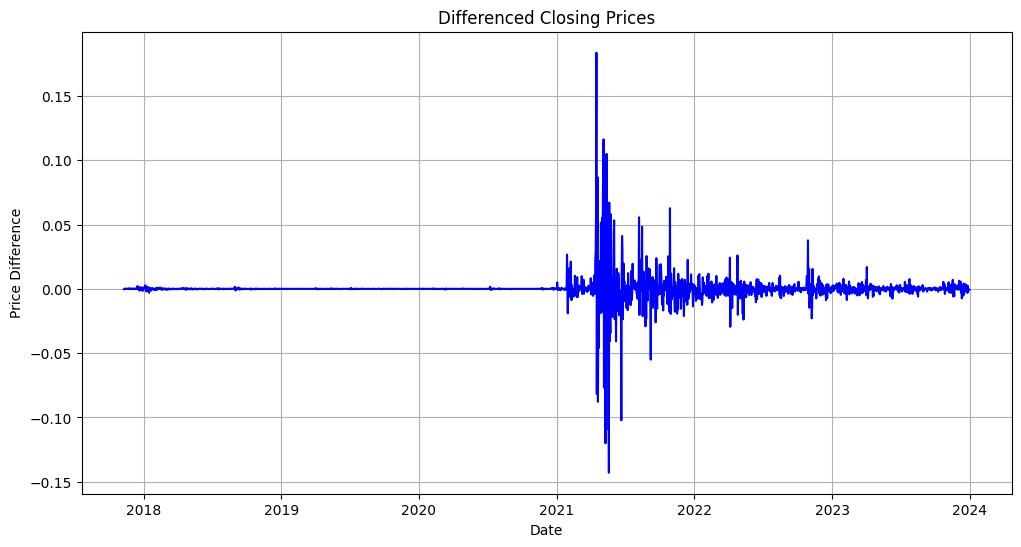

In [33]:

# Plot the differenced closing prices
plt.figure(figsize=(12, 6))
plt.plot(closing_prices_diff, color='blue')
plt.title('Differenced Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.show()


**Cheking for Staionarity after differencing**

In [34]:
# KPSS Test on differenced series
result_kpss_diff = kpss(closing_prices_diff, regression='c')
print('\nKPSS Test on Differenced Series:')
print(f'KPSS Statistic: {result_kpss_diff[0]}')
print(f'p-value: {result_kpss_diff[1]}')
print(f'Critical Values: {result_kpss_diff[3]}')


KPSS Test on Differenced Series:
KPSS Statistic: 0.032888863012511184
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-34-c5d036ecd1e3>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




*Inferences*
* KPSS Statistic: 0.032888863012511184 The KPSS Statistic is low, suggesting that the differenced series is relatively close to stationarity.
p-value: 0.1

* The p-value is higher than the common significance levels (e.g., 0.05), indicating a weaker rejection of the null hypothesis of stationarity. A higher p-value suggests that the series is not significantly non-stationary.
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

* The KPSS Statistic is less than the critical values, suggesting a lack of evidence against the null hypothesis of stationarity.

In [35]:
# ADF Test on differenced series
result_adf_diff = adfuller(closing_prices_diff, autolag='AIC')
print('\nADF Test on Differenced Series:')
print(f'ADF Statistic: {result_adf_diff[0]}')
print(f'p-value: {result_adf_diff[1]}')
print(f'Critical Values: {result_adf_diff[4]}')


ADF Test on Differenced Series:
ADF Statistic: -8.243296430657907
p-value: 5.641010380063722e-13
Critical Values: {'1%': -3.4333057085868255, '5%': -2.8628457425162424, '10%': -2.567465109783999}


*Inferences*
* ADF Statistic: -8.243296430657907:The ADF Statistic is highly negative, indicating strong evidence against the null hypothesis of a unit root, suggesting stationarity.

* p-value: 5.641010380063722e-13:The p-value is extremely small (close to zero), providing strong evidence against the presence of a unit root and supporting stationarity.

* Critical Values: {'1%': -3.4333057085868255, '5%': -2.8628457425162424, '10%': -2.567465109783999}:The ADF Statistic is significantly more negative than the critical values at all significance levels, confirming the rejection of the null hypothesis.

#Moving Average Code

The code below calculates the moving averages for different window sizes and plot them along with the original closing prices. This plot can be used to visualize the trend and smoothness of the data over time, helping in identifying potential support and resistance levels.

The plot helps visualize the trend and smooth out the price fluctuations in the stock or financial data. The moving averages provide an indication of the average price over a specified time period, allowing traders and analysts to identify trends and potential areas of support and resistance in the price movements.

<ipython-input-36-fad92707d68f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



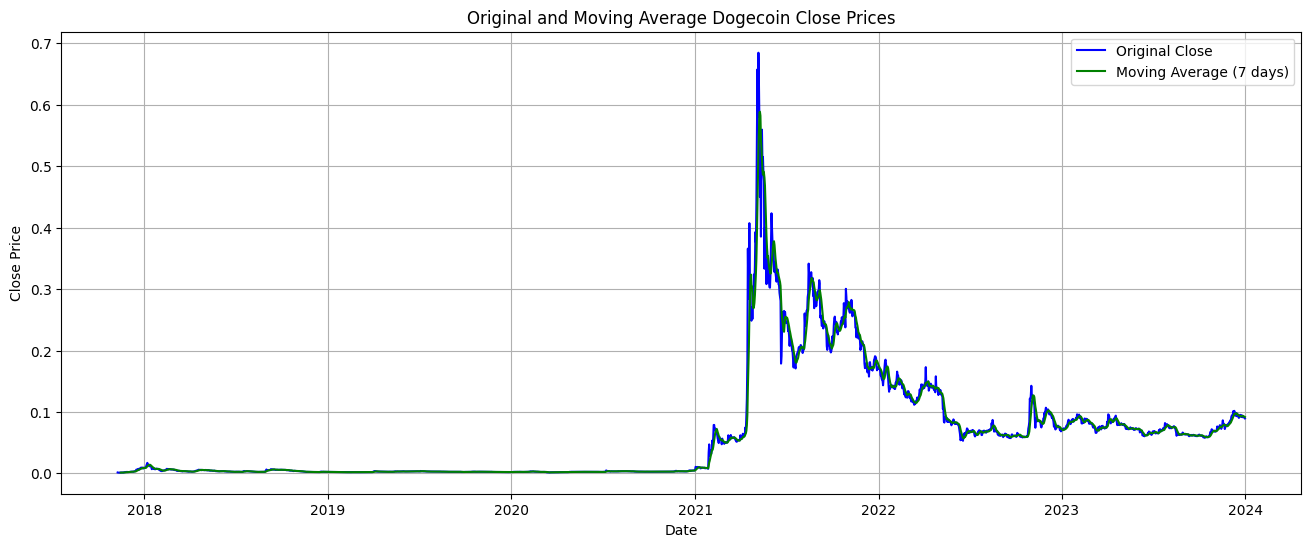

In [36]:

# Assuming 'Date' is the index of your DataFrame
dogecoin_model_data.index = pd.to_datetime(dogecoin_model_data.index)

# Moving Average
window_size = 7  # Adjust the window size as needed
dogecoin_model_data['Close_MA'] = dogecoin_model_data['Close'].rolling(window=window_size).mean()

# Plot original and moving average series
plt.figure(figsize=(16, 6))
plt.plot(dogecoin_model_data['Close'], label='Original Close', color='blue')
plt.plot(dogecoin_model_data['Close_MA'], label=f'Moving Average ({window_size} days)', color='green')
plt.title('Original and Moving Average Dogecoin Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


*Inferences*

* The Moving Average smoothens out short-term fluctuations in the Dogecoin closing prices.
* It helps in identifying trends more easily by highlighting the underlying direction of the prices.
* When the original close price crosses above the moving average, it may suggest a potential upward trend and when the original close price crosses below the moving average, it may indicate a potential downward trend.

#Log Transformation

The code will plot the log scale of the closing price on a graph. The x-axis represents the date, and the y-axis represents the logarithmic value of the closing price. The plot will show the trend and fluctuations in the log scale of the closing price over time

* Original Close (Blue Line): Represents the daily closing prices of Dogecoin.
* Log Transformation (Red Line): Represents the logarithmic transformation of the closing prices.

<ipython-input-37-81fc314fec34>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



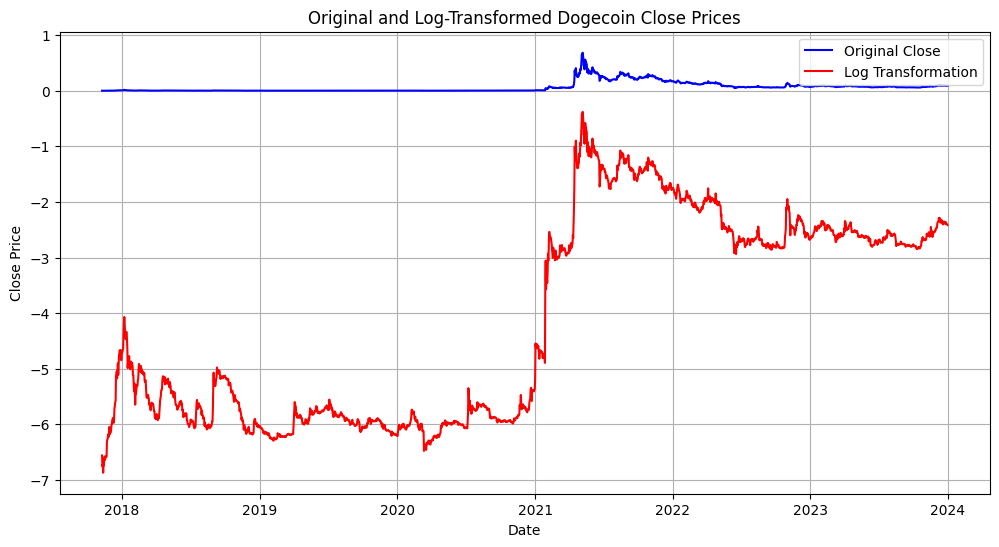

In [37]:
# Log Transformation
dogecoin_model_data['Close_Log'] = np.log(dogecoin_model_data['Close'])

# Plot original and log-transformed series
plt.figure(figsize=(12, 6))
plt.plot(dogecoin_model_data['Close'], label='Original Close', color='blue')
plt.plot(dogecoin_model_data['Close_Log'], label='Log Transformation', color='red')
plt.title('Original and Log-Transformed Dogecoin Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


*inferences*

* Log transformation is applied to mitigate the impact of extreme values and to stabilize the variance in time series data.
* The log-transformed series may help in identifying percentage changes more effectively.

#**MODELLING**

#ARIMA ( (AutoRegressive Integrated Moving Average)) as the baseline model

ARIMA (AutoRegressive Integrated Moving Average) is a popular time series model that combines autoregression, differencing, and moving average components

The Visualize the ACF and PACF plots of the differenced time series data shows the autocorrelation and as well as the Visualize the ACF and PACF plots of the differenced time series data.

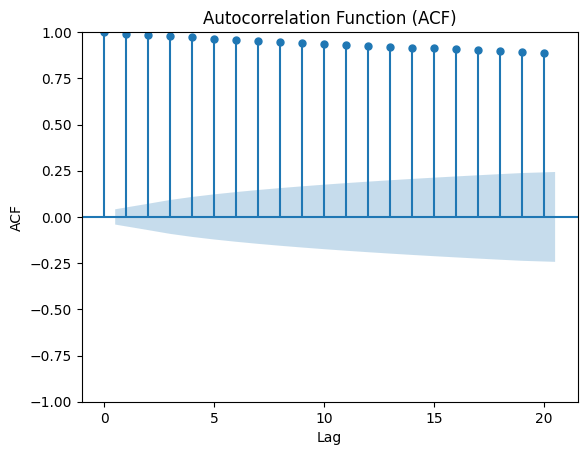

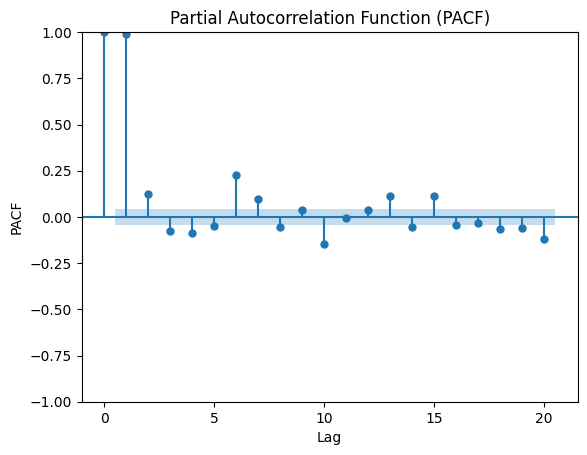

In [38]:
# Plot ACF
plot_acf(dogecoin_model_data['Close'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plot_pacf(dogecoin_model_data['Close'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


*Inferences*

Positive Autocorrelation (**ACF**)

* As the lag increases, the autocorrelation decreases.
* The significant positive autocorrelation at lag 1 suggests that the current observation is positively correlated with the previous observation.
* This indicates a potential autoregressive (AR) component in the time series.


Interpreting the **PACF** Plot:

* Peaks in the PACF plot indicate significant correlations at specific lags.
Lag 1: The PACF value at lag 1 is significant, suggesting a strong correlation between the current observation and the previous observation.

Lag 12: Another peak occurs at lag 12, indicating a potential yearly pattern (seasonality) in the data.

These peaks suggest that autoregressive terms related to monthly and yearly patterns may be relevant.

In [39]:
dogecoin_model_data.head()

,Close,Daily_Price_Change,Daily_Percentage_Return,RSI,Close_MA,Close_Log
Date,,,,,,
2017-11-09,0.001415,NaN,NaN,NaN,NaN,-6.560626
2017-11-10,0.001163,-0.000252,-21.668094,NaN,NaN,-6.756752
2017-11-11,0.001201,0.000038,3.164025,NaN,NaN,-6.724601
2017-11-12,0.001038,-0.000163,-15.703272,NaN,NaN,-6.870460
2017-11-13,0.001211,0.000173,14.285717,NaN,NaN,-6.716309


#Fitting the Model

The code below  splits the data into training and testing sets, trains an ARIMA model, makes predictions, calculates the RMSE, and visualizes the results from the test

RMSE: 0.02061973904043962


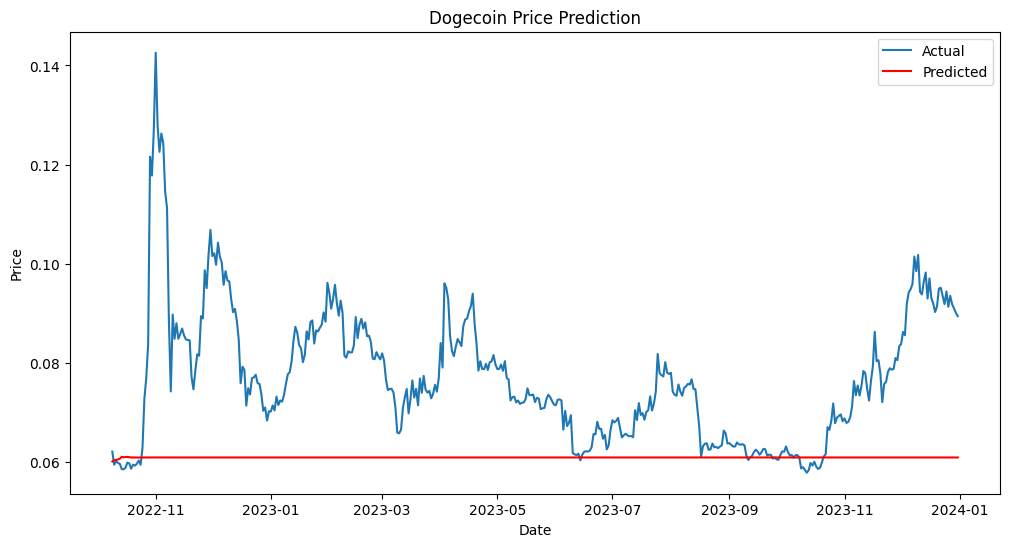

In [40]:


 #Suppress the frequency warning
import warnings
warnings.filterwarnings("ignore")

# Split the data into training and testing sets
train_size = int(len(dogecoin_model_data) * 0.8)
train, test = dogecoin_model_data[:train_size], dogecoin_model_data[train_size:]

# Train the ARIMA model
model = ARIMA(train['Close'], order=(5,1,0))  # Example order, replace with your own
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Calculate RMSE
mse = mean_squared_error(test['Close'], predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='r')
plt.title('Dogecoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


**Estimating Model Parameters**

* The code below  involves analyzing the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to identify significant lags

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2244
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6929.687
Date:                Fri, 16 Feb 2024   AIC                         -13853.375
Time:                        07:08:09   BIC                         -13836.228
Sample:                    11-09-2017   HQIC                        -13847.115
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2678      0.029     -9.113      0.000      -0.325      -0.210
ma.L1          0.1374      0.030      4.556      0.000       0.078       0.196
sigma2         0.0001   5.94e-07    204.129      0.0

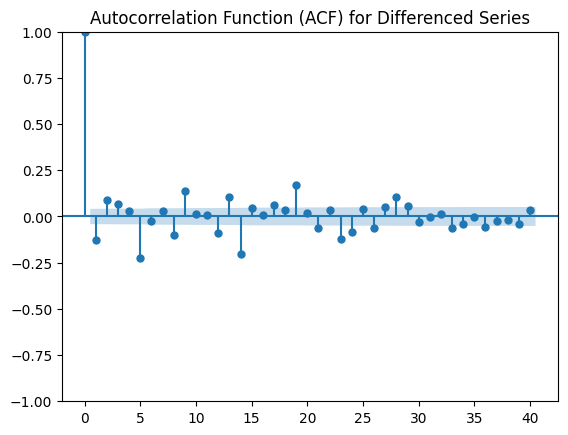

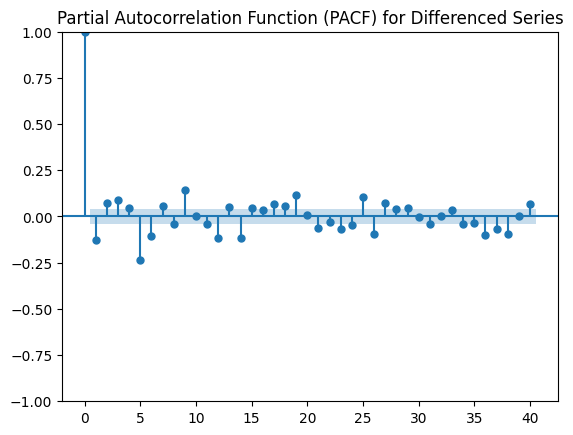

In [41]:

# Determine d (differencing order)
differenced_series = dogecoin_model_data['Close'].diff().dropna()

# Plot ACF and PACF for the differenced series
plot_acf(differenced_series, lags=40, title='Autocorrelation Function (ACF) for Differenced Series')
plot_pacf(differenced_series, lags=40, title='Partial Autocorrelation Function (PACF) for Differenced Series')

# Based on ACF and PACF plots, estimate p and q
# Adjust the orders accordingly based on significant lags
p = 1  # Estimate p based on PACF plot
q = 1  # Estimate q based on ACF plot

# Fit ARIMA model with the estimated parameters
model = ARIMA(dogecoin_model_data['Close'], order=(p, 1, q))  # Assuming d=1 for differencing
model_fit = model.fit()

# Summarize the model
print(model_fit.summary())

model_fit = model.fit()

# Summarize the model
print(model_fit.summary())


*Inferences*

**Model Evaluation**

* The log likelihood of the model is 6929.687, and the AIC (Akaike Information Criterion) is -13853.375. Lower AIC values indicate better model fit

**Diagnostic Tests**

* The Ljung-Box test for autocorrelation at lag 1 (L1) has a value of 0.26 with a p-value of 0.61, indicating no significant autocorrelation in the residuals.The Jarque-Bera test for normality has a p-value of 0.00, suggesting that the residuals may not be normally distributed.

**Coefficients**

* The coefficient for the autoregressive term (ar.L1) is approximately -0.268, indicating a negative relationship with the lagged value of the series.
* The coefficient for the moving average term (ma.L1) is approximately 0.137, suggesting a positive relationship with the error term.
* Both coefficients are statistically significant (p < 0.05).

**Autocorrelation for Residuals of the ARIMA model**

* The code below, the residual errors from the ARIMA model are extracted and stored in a DataFrame called residuals. Subsequently, two subplots are created. The first subplot (ax1) displays the line plot of the residual errors, providing a visual representation of the pattern or randomness in the errors.The secoond plot incicates the autocorrelation at lag 0 is always 1 because any data point is perfectly correlated with itself.

RMSE: 0.02


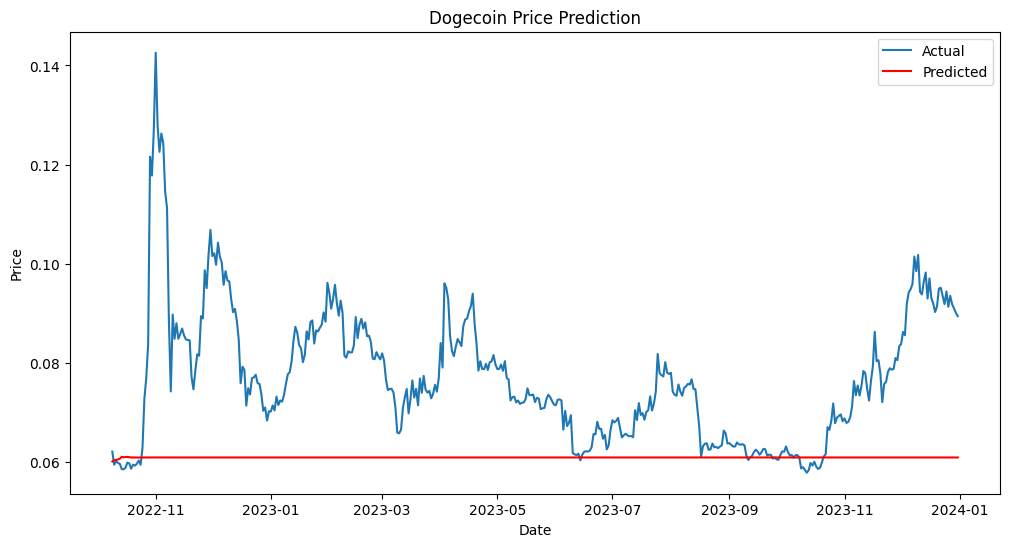

In [42]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate RMSE
mse = mean_squared_error(test['Close'], predictions)
rmse = np.sqrt(mse)
print('RMSE: %.2f' % rmse)

# Visualizing the predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='r')
plt.title('Dogecoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


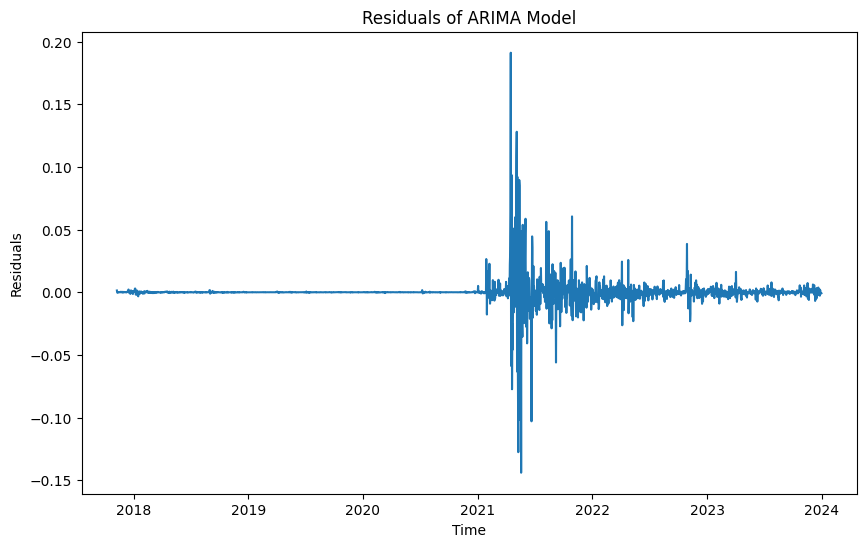

Ljung-Box Test Statistic: lb_stat
Ljung-Box p-value: lb_pvalue


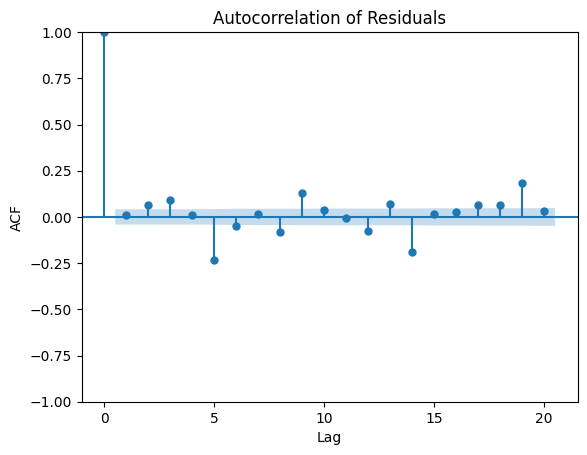

In [43]:

# Get the residuals of the ARIMA model
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Check for white noise using Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test_statistic, lb_p_value = acorr_ljungbox(residuals)
print(f'Ljung-Box Test Statistic: {lb_test_statistic}')
print(f'Ljung-Box p-value: {lb_p_value}')

# Plot ACF of residuals
plot_acf(residuals, lags=20)
plt.title('Autocorrelation of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()


*Inferences*

Residual plot

* The plot shows the residuals (differences between predicted and actual values) of an ARIMA model over time.
* From 2018 until just before 2021, the residuals appear relatively stable and close to zero.Around the year 2021, there is a significant spike in residuals. This indicates that the ARIMA model did not fit the data well during this period.
* After the spike, the residuals decrease but remain more volatile compared to previous years.

Autocorrelation Residual Plot.

* The lack of significant autocorrelation at other lags suggests that the residuals are relatively random and do not exhibit strong patterns over time.



**Seasonality check**

Th code below shows the seasonality of the dogecoin_model_data through comparing the seasonality  and closing price of the Dogecoin Data set

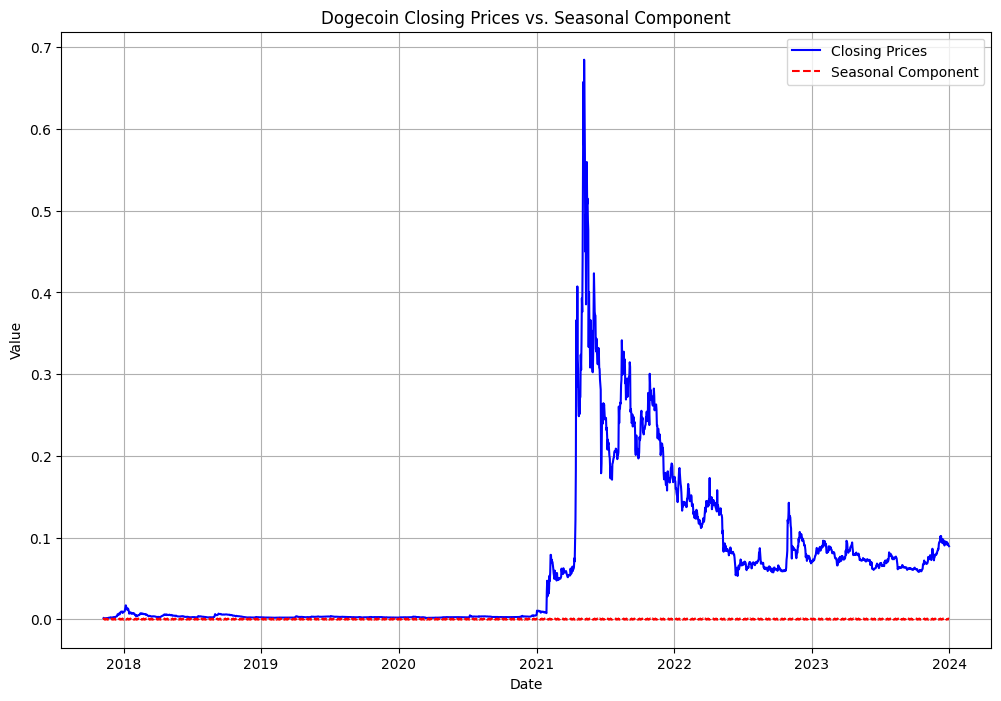

In [44]:

# Plot closing prices of Dogecoin
plt.figure(figsize=(12, 8))
plt.plot(dogecoin_model_data.index, dogecoin_model_data['Close'], color='blue', label='Closing Prices')

# Decompose ARIMA residuals
decomposition = seasonal_decompose(model_fit.resid)

# Visualize seasonal component
seasonal_component = decomposition.seasonal
plt.plot(dogecoin_model_data.index, seasonal_component, color='red', linestyle='--', label='Seasonal Component')

# Customize plot
plt.title('Dogecoin Closing Prices vs. Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


**inferences**

* The closing prices of Dogecoin show significant volatility over time, with a peak around 2021 and a decline afterwards. This could indicate that Dogecoin is influenced by external factors or events that are not related to seasonality, such as market demand, supply, speculation, or media attention.
* The seasonal component shows relatively stable values over time, with no clear pattern or cycle. This could indicate that Dogecoin does not exhibit any significant seasonality in its closing prices, meaning that there is no recurring and predictable variation that occurs at regular intervals within the data.

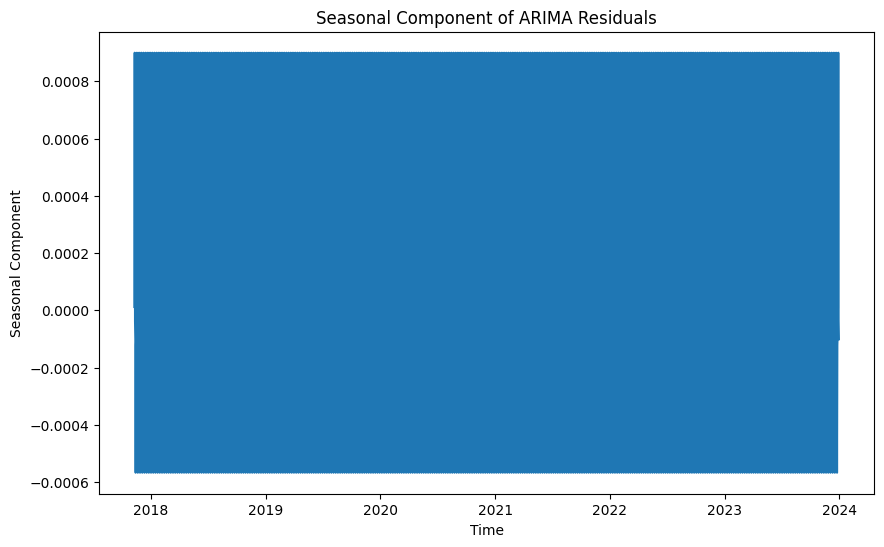

In [45]:
# Decompose ARIMA residuals
decomposition = seasonal_decompose(model_fit.resid)

# Visualize seasonal component
seasonal_component = decomposition.seasonal
plt.figure(figsize=(10, 6))
plt.plot(seasonal_component)
plt.title('Seasonal Component of ARIMA Residuals')
plt.xlabel('Time')
plt.ylabel('Seasonal Component')
plt.show()

*Inferences*

* The y-axis shows the values of the seasonal component, which range from approximately -0.0006 to 0.0008. These values are very small, which suggests that the seasonal component is not very significant or influential in the data. It also implies that the ARIMA model has captured most of the seasonality in the data, leaving only small variations in the residuals

#Facebook Prophet


 Facebook Prophet library can be used for forecasting stock prices, providing insights into future trends and patterns. Additionally, the evaluation metrics such as RMSE help assess the accuracy of the predictions, aiding in decision-making processes for investors and analysts.

 * Prophet allows users to specify custom holiday effects, which can be beneficial for modeling the impact of significant events or holidays on Dogecoin prices. This feature enables the model to adjust its forecasts based on known events that may influence the cryptocurrency market.

 *  Prophet provides flexibility in specifying model components, such as trend flexibility and seasonality regularization. Users can fine-tune these parameters to achieve optimal forecasting performance while accounting for the unique characteristics of the Dogecoin price data.

This codes performs the steps you mentioned: preparing the data, splitting it into training and validation sets, fitting the Prophet model, making predictions, evaluating the predictions using RMSE, and visualizing the results. It also prints information about the shapes of the training and validation sets. You just need to pass your DataFrame containing historical Dogecoin price data to the function.

**Facebook propheting with seasonality diasbled**

* Analyzing the model's performance  without seasonality enables us to evaluate the significance of seasonal patterns in the dataset. This assessment helps determine whether seasonal variations have a substantial influence on the predictive accuracy of the model.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc3qbwta/pvrr7cbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc3qbwta/0da7r_b8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5936', 'data', 'file=/tmp/tmpbc3qbwta/pvrr7cbg.json', 'init=/tmp/tmpbc3qbwta/0da7r_b8.json', 'output', 'file=/tmp/tmpbc3qbwta/prophet_model0eejn5s1/prophet_model-20240216070812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.030471604747992674


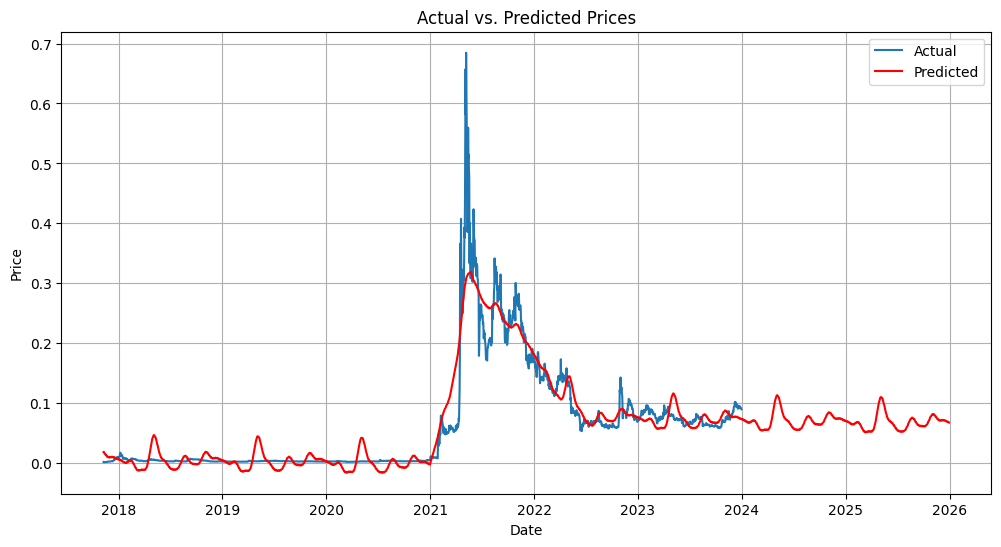

Data shape: (2244, 7)
Predictions shape: (2974, 19)


In [46]:
 #Moselling without seasonality
def fb_prophet_prediction(data):
    # Prepare data
    prophet_data = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

    # Instantiate Prophet model
    model = Prophet()

    # Fit model to data
    model.fit(prophet_data)

    # Make future dataframe for predictions until 2026
    future = model.make_future_dataframe(periods=365 * 2)  # Two years into the future

    # Make predictions
    forecast = model.predict(future)

    # Extract actual and predicted values
    actual = prophet_data['y'].values
    predicted = forecast['yhat'].values

    # Calculate RMSE
    rmse = mean_squared_error(actual, predicted[:len(actual)], squared=False)
    print('RMSE:', rmse)

    # Plot actual and predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(prophet_data['ds'], actual, label='Actual')
    plt.plot(forecast['ds'], predicted, label='Predicted', color='r')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs. Predicted Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print information about the data and model
    print('Data shape:', prophet_data.shape)
    print('Predictions shape:', forecast.shape)

# Call the function with your DataFrame containing historical stock price data
fb_prophet_prediction(dogecoin_model_data)


*Inferences*

* Disabling Daily Seasonality: The model has disabled daily seasonality, which means it is not considering any recurring patterns on a daily basis.

* Model Training: The model has been trained successfully using the historical data provided. Prophet utilizes an optimization algorithm (in this case, L-BFGS) to fit the model parameters to the training data.

* RMSE Calculation: The Root Mean Squared Error (RMSE) is calculated to evaluate the accuracy of the model's predictions. The RMSE value obtained is 0.0305, indicating the average difference between the predicted and actual values.

**Facebook propheting with seasonality enabled**

* Enabling seasonality increases the complexity of the Prophet model by incorporating additional seasonal components, such as daily, weekly, or yearly patterns. Evaluating both scenarios provides insights into whether the added complexity improves predictive accuracy.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc3qbwta/s7hk2u1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc3qbwta/iwlfjgat.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67287', 'data', 'file=/tmp/tmpbc3qbwta/s7hk2u1u.json', 'init=/tmp/tmpbc3qbwta/iwlfjgat.json', 'output', 'file=/tmp/tmpbc3qbwta/prophet_modelevov84ob/prophet_model-20240216070814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.000927380737873661


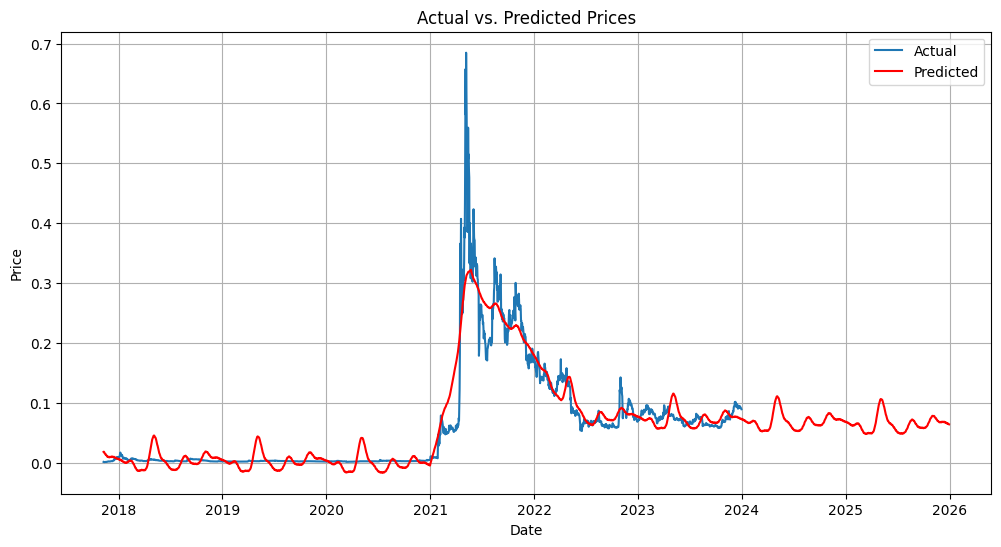

Data shape: (2244, 7)
Predictions shape: (2974, 22)


In [47]:
#This codes runs the Facebook model with seasonality enables and predicting the prices for till 2026
def fb_prophet_prediction(data):
    # Prepare data
    prophet_data = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

    # Instantiate Prophet model with daily seasonality enabled
    model = Prophet(daily_seasonality=True)

    # Fit model to data
    model.fit(prophet_data)

    # Make future dataframe for predictions until 2026
    future = model.make_future_dataframe(periods=365 * 2)  # Two years into the future

    # Make predictions
    forecast = model.predict(future)

    # Extract actual and predicted values
    actual = prophet_data['y'].values
    predicted = forecast['yhat'].values

    # Calculate RMSE
    rmse = mean_squared_error(actual, predicted[:len(actual)], squared=True)
    print('RMSE:', rmse)

    # Plot actual and predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(prophet_data['ds'], actual, label='Actual')
    plt.plot(forecast['ds'], predicted, label='Predicted', color='r')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs. Predicted Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print information about the data and model
    print('Data shape:', prophet_data.shape)
    print('Predictions shape:', forecast.shape)

# Call the function with your DataFrame containing historical stock price data
fb_prophet_prediction(dogecoin_model_data)


*Inferences*

* Model Optimization: The Prophet model has been optimized using the L-BFGS algorithm, as indicated by the debug output. This algorithm is commonly used to estimate the parameters of the Prophet model based on the provided historical data.

* RMSE Calculation: The Root Mean Squared Error (RMSE) has been calculated to evaluate the accuracy of the model's predictions. The calculated RMSE value is 0.00093, which represents the average difference between the predicted and actual values in the validation dataset. A lower RMSE indicates that the model's predictions are closer to the actual values, suggesting better predictive performance.

* Comparison: The obtained RMSE value of 0.00093 indicates a very low error rate, signifying that the model's predictions align closely with the actual data points. This suggests that the model performs well in forecasting future values with high accuracy.

#MODEL 3: LSTM MODEL (Long Short-Term Memory)

In [65]:

# Load and preprocess the dataset
# Assuming 'Close' is the column of interest in your DataFrame
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    return scaled_data, scaler

# Split the dataset into training and testing sets
def split_data(data, train_ratio=0.8):
    train_size = int(len(data) * train_ratio)
    train_data, test_data = data[:train_size], data[train_size:]
    return train_data, test_data

# Create sequences for LSTM input
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define LSTM model architecture
def create_model(seq_length):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model
def train_model(model, X_train, y_train, epochs, batch_size):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    mse = mean_squared_error(y_test_inv, predictions)
    rmse = np.sqrt(mse)
    print('RMSE:', rmse)

# Make predictions
def make_predictions(model, X):
    predictions = model.predict(X)
    return predictions
    # Make predictions on training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Load and preprocess the dataset
dogecoin_data = pd.read_csv('dogecoin_data.csv')
scaled_data, scaler = preprocess_data(dogecoin_data['Close'])
train_data, test_data = split_data(scaled_data)
seq_length = 60  # Define the sequence length for input data
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create and train the LSTM model
lstm_model = create_model(seq_length)
train_model(lstm_model, X_train, y_train, epochs=100, batch_size=32)

# Evaluate the LSTM model
evaluate_model(lstm_model, X_test, y_test, scaler)

# Make predictions using the trained model
predictions = make_predictions(lstm_model, X_test)


13/13 [==============================] - 0s 8ms/step
Epoch 1/100
55/55 [==============================] - 11s 80ms/step - loss: 0.0050
Epoch 2/100
55/55 [==============================] - 5s 95ms/step - loss: 0.0021
Epoch 3/100
55/55 [==============================] - 4s 76ms/step - loss: 0.0019
Epoch 4/100
55/55 [==============================] - 4s 76ms/step - loss: 0.0017
Epoch 5/100
55/55 [==============================] - 5s 97ms/step - loss: 0.0017
Epoch 6/100
55/55 [==============================] - 4s 76ms/step - loss: 0.0017
Epoch 7/100
55/55 [==============================] - 4s 76ms/step - loss: 0.0017
Epoch 8/100
55/55 [==============================] - 5s 95ms/step - loss: 0.0016
Epoch 9/100
55/55 [==============================] - 4s 77ms/step - loss: 0.0014
Epoch 10/100
55/55 [==============================] - 8s 142ms/step - loss: 0.0015
Epoch 11/100
55/55 [==============================] - 8s 142ms/step - loss: 0.0013
Epoch 12/100
55/55 [==============================]

In [74]:
# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)

print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


Train MSE: 0.00030649223926856005
Train RMSE: 0.017506919753873324
Train MAE: 0.0063332869460651494
Test MSE: 1.8500482560525694e-05
Test RMSE: 0.004301218729677171
Test MAE: 0.003220396922838815


In [76]:
dogecoin_model_data.head(10)

,Close,Daily_Price_Change,Daily_Percentage_Return,RSI,Close_MA,Close_Log
Date,,,,,,
2017-11-09,0.001415,NaN,NaN,NaN,NaN,-6.560626
2017-11-10,0.001163,-0.000252,-21.668094,NaN,NaN,-6.756752
2017-11-11,0.001201,0.000038,3.164025,NaN,NaN,-6.724601
2017-11-12,0.001038,-0.000163,-15.703272,NaN,NaN,-6.870460
2017-11-13,0.001211,0.000173,14.285717,NaN,NaN,-6.716309
2017-11-14,0.001184,-0.000027,-2.280403,NaN,NaN,-6.738857
2017-11-15,0.001339,0.000155,11.575796,NaN,0.001222,-6.615832
2017-11-16,0.001390,0.000051,3.669068,NaN,0.001218,-6.578452
2017-11-17,0.001313,-0.000077,-5.864433,NaN,0.001239,-6.635441


Train MSE: 0.00030649223926856005
Train RMSE: 0.017506919753873324
Train MAE: 0.0063332869460651494
Test MSE: 1.8500482560525694e-05
Test RMSE: 0.004301218729677171
Test MAE: 0.003220396922838815


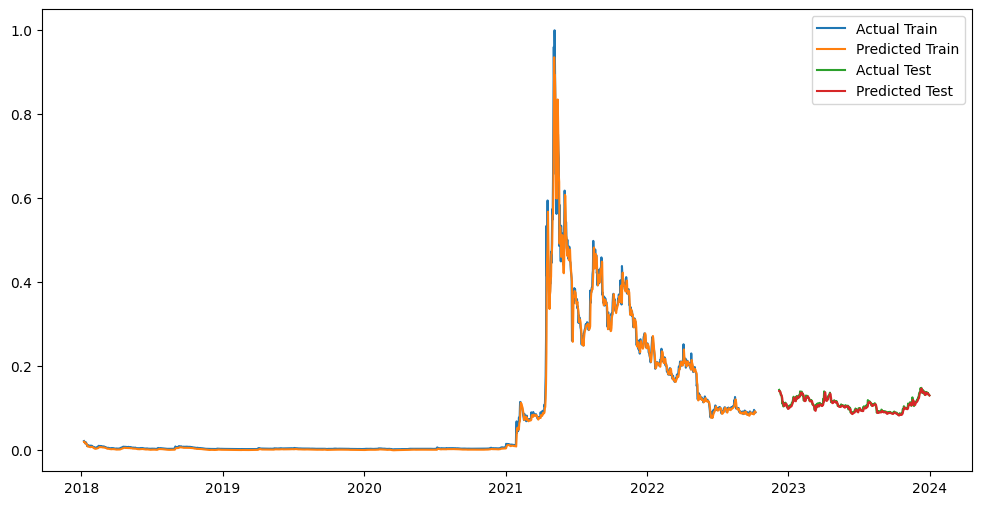

In [95]:

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)

print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)

# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(dogecoin_model_data.index[seq_length:train_size], y_train, label='Actual Train')
plt.plot(dogecoin_model_data.index[seq_length:train_size], train_predictions, label='Predicted Train')
plt.plot(dogecoin_model_data.index[train_size+seq_length:], y_test, label='Actual Test')
plt.plot(dogecoin_model_data.index[train_size+seq_length:], test_predictions, label='Predicted Test')
plt.legend()
plt.show()

In [96]:
# Flatten the arrays to make them 1-dimensional
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()
train_predictions_flat = train_predictions.flatten()
test_predictions_flat = test_predictions.flatten()

# Create the df_predictions DataFrame
df_predictions = pd.DataFrame({'Actual': np.concatenate([y_train_flat, y_test_flat]), 'Predicted': np.concatenate([train_predictions_flat, test_predictions_flat])})
df_predictions.index = df.index[seq_length:seq_length+concatenated_length]
df_predictions.head(10)

NameError: name 'df' is not defined